In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13ab535dc40>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13ab5389520>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [12]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()


['measurement', 'station']

In [13]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date

'2017-08-23'

In [25]:
# Convert into a date format
last_date = (dt.datetime.strptime(last_date, "%Y-%m-%d")).date()
last_date

datetime.date(2017, 8, 23)

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_before_last_date = last_date - dt.timedelta(days=365)
year_before_last_date

datetime.date(2016, 8, 23)

In [34]:
# Perform a query to retrieve the data and precipitation scores
# Find precipitation score between year_before_Last_date and Last_date
prcp_score = session.query(Measurement.date, Measurement.prcp).\
                              filter((Measurement.date <= first_date)\
                                     & (Measurement.date >= year_before_first_date)).all()

In [62]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_score_df = pd.DataFrame(prcp_score).set_index("date")
prcp_score_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [70]:
# Sort the dataframe by date
prcp_df_sorted = prcp_score_df.sort_index(axis=0, ascending=True)
prcp_df_sorted

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [71]:
# Drop null values from the dataset
prcp_df_sorted.dropna()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [98]:
# Rename prcp column to "Precipitation"
prcp_df_sorted.rename(columns={"prcp":"Precipitation"}, inplace=True)

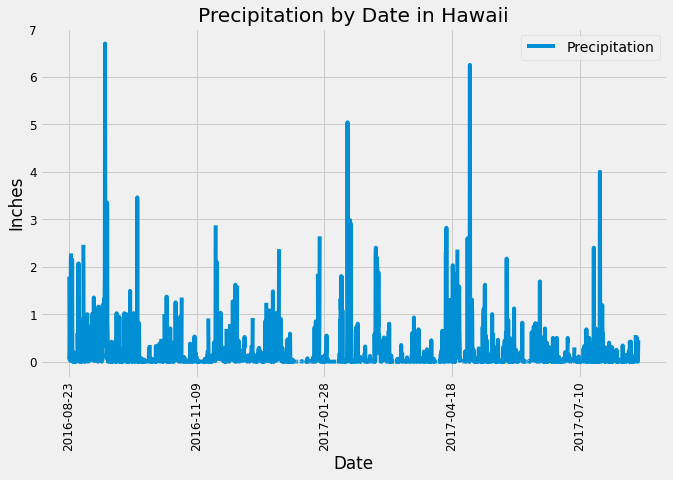

In [107]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df_sorted.plot(figsize=(10,6), fontsize=12, rot=90, title = "Precipitation by Date in Hawaii")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout
plt.show()

In [108]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [109]:
# Design a query to calculate the total number stations in the dataset
count_stations = session.query(Station.id).count()
count_stations

9

In [118]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_most_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Calculate the lowest temperature for the most active station
low_temp = session.query(func.min(Measurement.tobs)). filter(Measurement.station == 'USC00519281').all()
low_temp

[(54.0)]

In [133]:
# Calculate the Highest temperature for the most active station
high_temp = session.query(func.max(Measurement.tobs)). filter(Measurement.station == 'USC00519281').all()
high_temp

[(85.0)]

In [134]:
# Calculate the Average temperature for the most active station
avg_temp = session.query(func.avg(Measurement.tobs)). filter(Measurement.station == 'USC00519281').all()
avg_temp

[(71.66378066378067)]

In [135]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_results = session.query(Measurement.tobs). filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_before_last_date).all()

In [141]:
# Show most active results in a dataframe
results_df = pd.DataFrame(most_active_results)
results_df.head()
#pd.DataFrame({"# of Measurements":measurement_count})

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


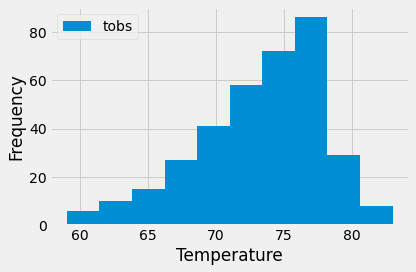

In [143]:
# Plot into a histogram
results_df.plot.hist(bins=10)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()

# Close session

In [144]:
# Close Session
session.close()